<a href="https://colab.research.google.com/github/carlotamartin/Classification-vehicles/blob/main/Training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data clening

First, we are going to clean all the data. We unzip the zip file.

In [ ]:
!unzip /content/drive/MyDrive/Vehicle_Classification_Dataset/Thai_vehicle_classification_dataset_TR1.zip -d /content/drive/MyDrive/Vehicle_Classification_Dataset/Data

Se han truncado las últimas 5000 líneas del flujo de salida.
  inflating: /content/drive/MyDrive/Vehicle_Classification_Dataset/Data/Thai_vehicle_classification_dataset_TR1/train/labels/f14_frame3450.txt  
  inflating: /content/drive/MyDrive/Vehicle_Classification_Dataset/Data/Thai_vehicle_classification_dataset_TR1/train/labels/f14_frame3600.txt  
  inflating: /content/drive/MyDrive/Vehicle_Classification_Dataset/Data/Thai_vehicle_classification_dataset_TR1/train/labels/f14_frame3650.txt  
 extracting: /content/drive/MyDrive/Vehicle_Classification_Dataset/Data/Thai_vehicle_classification_dataset_TR1/train/labels/f14_frame3800.txt  
 extracting: /content/drive/MyDrive/Vehicle_Classification_Dataset/Data/Thai_vehicle_classification_dataset_TR1/train/labels/f14_frame3850.txt  
  inflating: /content/drive/MyDrive/Vehicle_Classification_Dataset/Data/Thai_vehicle_classification_dataset_TR1/train/labels/f14_frame3950.txt  
 extracting: /content/drive/MyDrive/Vehicle_Classification_Dataset/Da

We need to mount your Google Drive in Google Colab to access your dataset. 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


We navigate where we have the dataset

In [ ]:
cd /content/drive/MyDrive/Vehicle_Classification_Dataset/Data/Thai_vehicle_classification_dataset_TR1

/content/drive/MyDrive/Vehicle_Classification_Dataset/Data/Thai_vehicle_classification_dataset_TR1


We download the libraries that we are going to use for data cleaning

In [ ]:
#Importamos las librerías
import cv2
import os

We are going to check if there exists any image that is damage or their name is incorrect. 

In [ ]:
# # Path to your image directory
image_dir = '/content/drive/MyDrive/Vehicle_Classification_Dataset/Data/Thai_vehicle_classification_dataset_TR1/train/images/'

In [ ]:
# Loop through all images in the directory
for filename in os.listdir(image_dir):
    try:
        img = cv2.imread(os.path.join(image_dir, filename))
        if img is None:
            # Remove the image if it is corrupt
            os.remove(os.path.join(image_dir, filename))
    except:
        # Remove the image if there is an error reading the file
        os.remove(os.path.join(image_dir, filename))

In [ ]:
label_dir = '/content/drive/MyDrive/Vehicle_Classification_Dataset/Data/Thai_vehicle_classification_dataset_TR1/train/labels/'

In [ ]:
# Loop through all label files in the directory
for filename in os.listdir(label_dir):
    try:
        # Open the label file
        with open(os.path.join(label_dir, filename), 'r') as f:
            lines = f.readlines()
            # Check if the label file has at least one line
            if len(lines) < 1:
                # Remove the label file if it is empty
                os.remove(os.path.join(label_dir, filename))
    except:
        # Remove the label file if there is an error reading the file
        os.remove(os.path.join(label_dir, filename))

Now we are going to check if there exits any image or label duplicated. For do this, we are going to use the library from python called `imagehash`. This created an unique hash for each image.
It then checks if an image with the same hash exists in the images directory, and if so, removes the duplicate image and its corresponding tag file. If an image with the same hash does not exist, the code renames the image and its tag file with its hash.

In [ ]:
from PIL import Image
import imagehash

In [ ]:
# Loop through all images in the directory
for filename in os.listdir(image_dir):
    try:
        # Open the image file using PIL
        img = Image.open(os.path.join(image_dir, filename))

        # Calculate the hash for the image
        hash = str(imagehash.average_hash(img))

        # Check if an image with the same hash already exists
        if os.path.exists(os.path.join(image_dir, hash + '.jpg')):
            # Remove the duplicate image file
            os.remove(os.path.join(image_dir, filename))
            # Remove the corresponding label file
            os.remove(os.path.join(label_dir, filename[:-4] + '.txt'))
        else:
            # Rename the image file with its hash
            os.rename(os.path.join(image_dir, filename), os.path.join(image_dir, hash + '.jpg'))
            # Rename the corresponding label file with its hash
            os.rename(os.path.join(label_dir, filename[:-4] + '.txt'), os.path.join(label_dir, hash + '.txt'))

    except:
        # Remove the image and its corresponding label file if there is an error reading the image file
        os.remove(os.path.join(image_dir, filename))
        os.remove(os.path.join(label_dir, filename[:-4] + '.txt'))

FileNotFoundError: ignored

Podemos ver que se han eliminado las imágenes que tienen nombre erróneos:
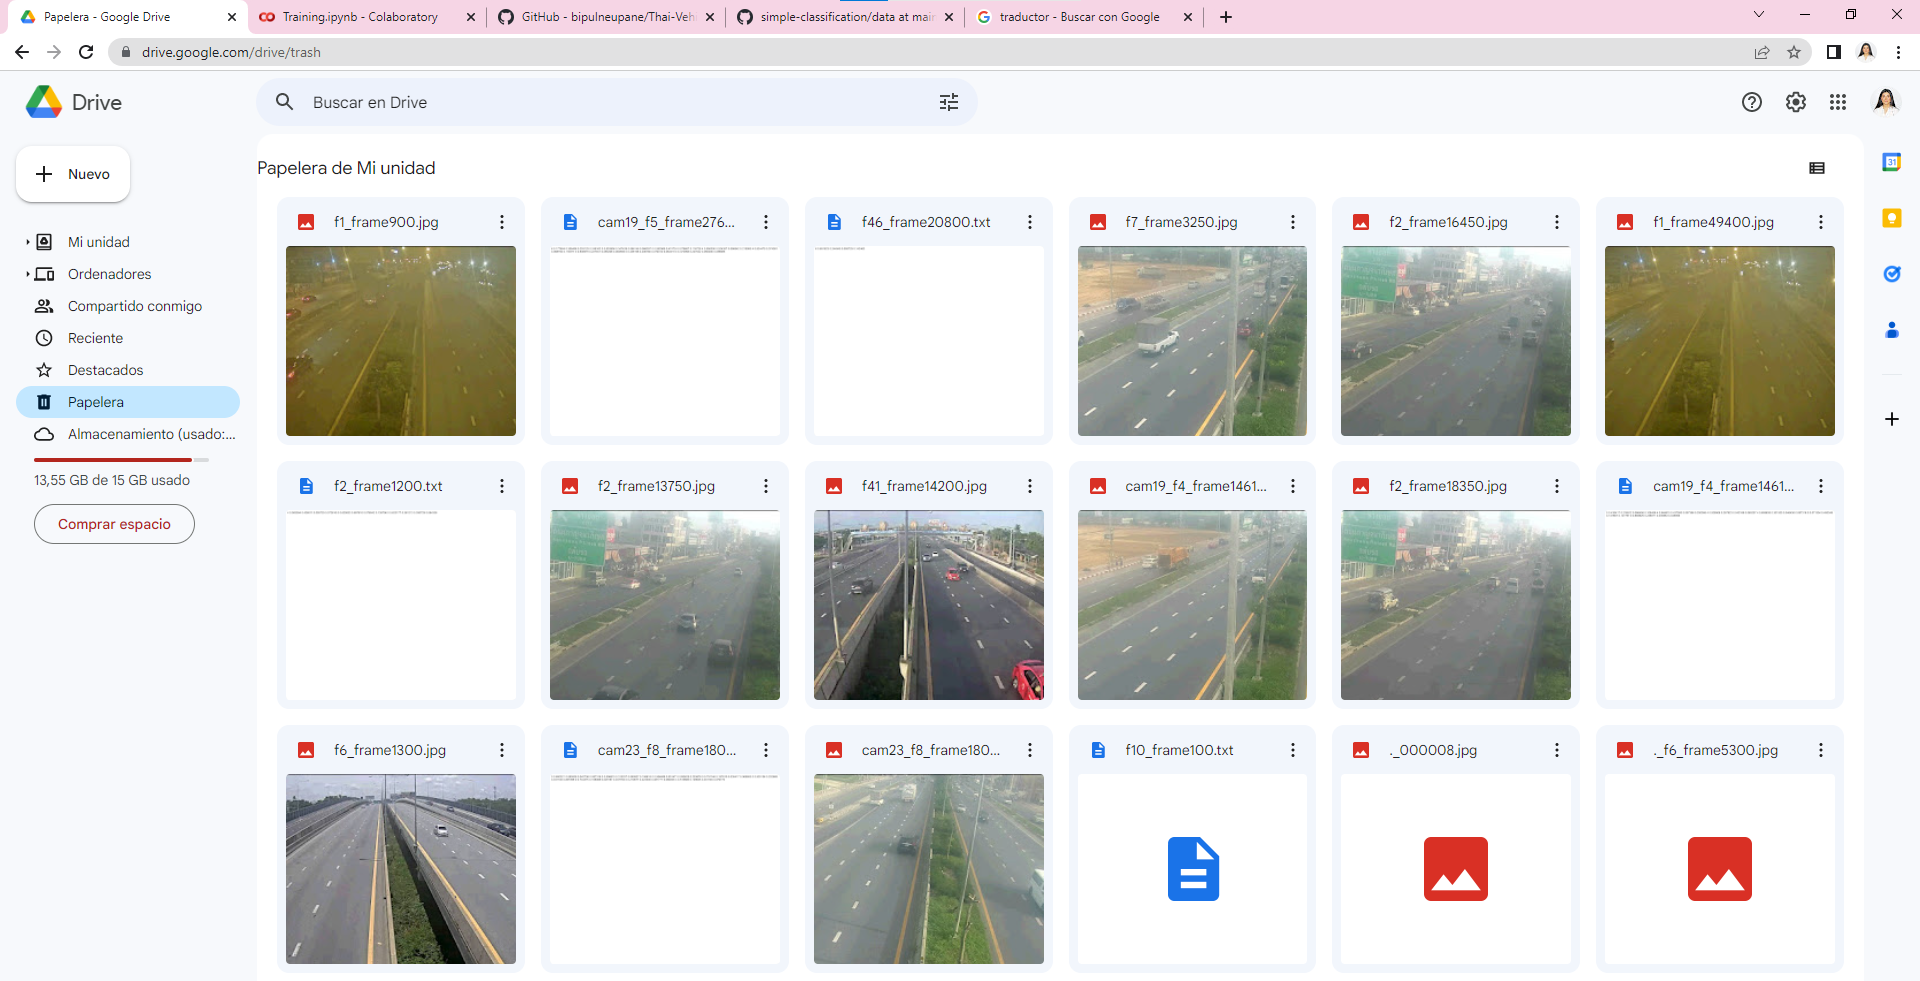

Now we are going to delete the images that have a low resolution or very hig resolution. Also, we are going to resize the resolution of the images for been more easy to do the classification project. For this, we are going to use the library called `OpenCV`. 

In [ ]:
#We download the library
!pip install opencv-python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import cv2

In [ ]:
# Directorio de imágenes
img_dir = '/content/drive/MyDrive/Vehicle_Classification_Dataset/Data/Thai_vehicle_classification_dataset_TR1/train/images'

# Resolución deseada
desired_height = 480
desired_width = 640

# Iterar a través de cada imagen en el directorio
for img_name in os.listdir(img_dir):
    # Leer la imagen
    img_path = os.path.join(img_dir, img_name)
    img = cv2.imread(img_path)
    
    # Obtener la resolución actual
    height, width, channels = img.shape
    
    # Verificar si la resolución es demasiado baja o demasiado alta
    if height < desired_height or width < desired_width:
        # Eliminar la imagen si la resolución es demasiado baja
        os.remove(img_path)
        continue
    elif height > desired_height or width > desired_width:
        # Cambiar la resolución si es demasiado alta
        img = cv2.resize(img, (desired_width, desired_height))
        cv2.imwrite(img_path, img)

We do the same with the labels file

In [ ]:
import os

# Directorio de etiquetas
label_dir = '/content/drive/MyDrive/Vehicle_Classification_Dataset/Data/Thai_vehicle_classification_dataset_TR1/train/labels'

# Resolución deseada
desired_height = 480
desired_width = 640

# Iterar a través de cada archivo de etiqueta en el directorio
for label_name in os.listdir(label_dir):
    # Leer las etiquetas
    label_path = os.path.join(label_dir, label_name)
    with open(label_path, 'r') as label_file:
        lines = label_file.readlines()
    
    # Verificar si hay contenido en el archivo
    if len(lines) == 0:
        # Eliminar el archivo si está vacío
        os.remove(label_path)
        continue
    
    # Obtener las coordenadas actuales de las etiquetas
    coords = []
    for line in lines:
        parts = line.strip().split()
        if len(parts) == 5:
            _, x, y, w, h = parts
            coords.append([float(x), float(y), float(w), float(h)])
    
    # Verificar si hay coordenadas en el archivo
    if len(coords) == 0:
        # Eliminar el archivo si no hay coordenadas
        os.remove(label_path)
        continue
    
    # Verificar si la resolución es demasiado baja o demasiado alta
    if coords[0][3] * desired_height < height * 0.8 or coords[0][3] * desired_height > height * 1.2:
        # Eliminar el archivo si la resolución es demasiado baja o demasiado alta
        os.remove(label_path)
        continue
    
    # Cambiar la resolución de las etiquetas
    new_coords = []
    for coord in coords:
        new_x = coord[0] * desired_width / width
        new_y = coord[1] * desired_height / height
        new_w = coord[2] * desired_width / width
        new_h = coord[3] * desired_height / height
        new_coords.append([new_x, new_y, new_w, new_h])
    
    # Escribir las nuevas etiquetas en el archivo
    with open(label_path, 'w') as label_file:
        for coord in new_coords:
            label_file.write(' '.join(str(c) for c in [0] + coord) + '\n')


## Normalizace the data
To normalize the label values, we can simply divide each value by the corresponding image resolution (ie divide the x and y coordinate values ​​by the image width and height, respectively).

Este código leerá las imágenes y labels originales desde sus respectivas carpetas, y guardará las imágenes normalizadas y labels normalizados en sus respectivas carpetas correspondientes. El código también normalizará los valores de los labels para que estén en el rango de 0 a 1.

This code will read the original images and labels 

In [ ]:
import numpy as np

In [ ]:
# ruta a la carpeta que contiene las imágenes
folder_path = "/content/drive/MyDrive/Vehicle_Classification_Dataset/Data/Thai_vehicle_classification_dataset_TR1/train/images"

# obtener una lista de nombres de archivos de imagen en la carpeta
file_list = os.listdir(folder_path)

# recorrer cada archivo de imagen en la carpeta
for filename in file_list:
    if filename.endswith(".jpg") or filename.endswith(".jpeg") or filename.endswith(".png"):
        # cargar la imagen y aplicar la normalización
        image_path = os.path.join(folder_path, filename)
        image = cv2.imread(image_path)
        image_norm = cv2.normalize(image, None, alpha=0,beta=200, norm_type=cv2.NORM_MINMAX)

        # reemplazar la imagen original con la imagen normalizada
        cv2.imwrite(image_path, image_norm)



From here, we wrote a code to train and predict image classification similar to the code in the practice of dogs and cats. It is impossible to load such a large number of images on such a small processor, so we would need a computer and a more powerful interface for that.

# La Capa Convolucional

In [ ]:
import torch
import torchvision

device = "cuda" if torch.cuda.is_available() else "cpu"

In [ ]:
from torch.utils.data import Dataset, DataLoader
from torchvision.transforms import ToTensor

In [ ]:
classes = ('Car', 'Bus', 'Taxi', 'Bike', 'Pickup', 'Track', 'Trailer')

In [ ]:

# definir una clase de conjunto de datos personalizado
class VehicleDataset(Dataset):
    def __init__(self, images_dir, labels, transform=None):
        self.images_dir = images_dir
        self.labels = labels
        self.transform = transform

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, index):
        label_file = self.labels[index]
        image_file = label_file.replace(".txt", ".jpg")
        image_path = os.path.join(self.images_dir, image_file)
        label_path = os.path.join(self.images_dir, label_file)
        with open(label_path, "r") as f:
            label = f.read().strip()
        img = Image.open(image_path).convert('RGB')
        if self.transform:
            img = self.transform(img)
        return img, torch.tensor(int(label))

In [ ]:
data_transform = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.RandomCrop(224),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

In [ ]:

# Create dataloaders
train_dir = '/content/drive/MyDrive/Vehicle_Classification_Dataset/Data/Thai_vehicle_classification_dataset_TR1/train'
images_paths = os.listdir(train_dir)
random.shuffle(images_paths)
train_img_list = images_paths[0:20000]
val_img_list = images_paths[20000:25000]
train_img_list = images_paths[0:2000]
val_img_list = images_paths[2000:2500]
train_dataset = CatDogDataset(train_dir, train_img_list, transform = data_transform)
val_dataset = CatDogDataset(train_dir, val_img_list, transform = data_transform)
train_dataloader = DataLoader(train_dataset, batch_size = 64, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size = 64, shuffle=False)


In [ ]:

# Visualize images in the dataset
samples, labels = next(iter(train_dataloader))
plt.figure(figsize=(16,32))
grid_imgs = torchvision.utils.make_grid(samples[:32])
np_grid_imgs = grid_imgs.numpy()
# in tensor, image is (batch, width, height), so you have to transpose it to (width, height, batch) in numpy to show it.
plt.imshow(cv2.cvtColor(np.transpose(np_grid_imgs, (1,2,0)), cv2.COLOR_BGR2RGB))
plt.show()

In [ ]:

"""# Nueva sección"""

## Step 3: Define Deep Learning model
class scratch_nn(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=100, kernel_size=5, stride=1, padding=0)
        self.conv2 = nn.Conv2d(100, 200, 3, stride=1, padding=0)
        self.conv3 = nn.Conv2d(200, 400, 3, stride=1, padding=0)
        self.mpool = nn.MaxPool2d(kernel_size=3)
        self.relu = nn.ReLU()
        self.linear1 = nn.Linear(19600,1024)
        self.linear2 = nn.Linear(1024,512)
        self.linear3 = nn.Linear(512,2)
        self.classifier = nn.Softmax(dim=1)

    def forward(self,x):
        x = self.mpool( self.relu(self.conv1(x)) )
        x = self.mpool( self.relu(self.conv2(x)) )
        x = self.mpool( self.relu(self.conv3(x)) )
        x = torch.flatten(x, start_dim=1)
        x = self.linear1(x)
        x = self.linear2(x)
        x = self.linear3(x)
        x = self.classifier(x)
        return x


In [ ]:

## Step 4: Define train_step and predict functions
def train_step(train_loader, model, optimizer, criterion, device):
    # define the optimization
    avg_loss = []
    predictions, actuals = list(), list()
    # enumerate mini batches
    for i, (inputs, targets) in enumerate(train_loader):
        inputs, targets = inputs.to(device), targets.to(device)
        # clear the gradients
        optimizer.zero_grad()
        # compute the model output
        yhat = model(inputs)
        # calculate loss
        loss = criterion(yhat, targets)
        # credit assignment
        loss.backward()
        # update model weights
        optimizer.step()
        avg_loss.append(loss.item())
        # Get accruacy
        actual = targets.cpu().numpy()
        yhat = argmax(yhat.detach().cpu().numpy(), axis=1)
        # reshape for stacking
        actual = actual.reshape((len(actual), 1))
        yhat = yhat.reshape((len(yhat), 1))
        # store
        predictions.append(yhat)
        actuals.append(actual)

    predictions, actuals = vstack(predictions), vstack(actuals)
    # calculate accuracy
    acc = accuracy_score(actuals, predictions)
    return sum(avg_loss)/len(avg_loss), acc


In [ ]:

# evaluate the model
def evaluation_step(val_loader, model, criterion, device):
    avg_loss = []
    predictions, actuals = list(), list()
    for i, (inputs, targets) in enumerate(val_loader):
        inputs, targets = inputs.to(device), targets.to(device)
        
        # evaluate the model on the test set
        yhat = model(inputs)
        loss = criterion(yhat, targets)
        avg_loss.append(loss.item())
        # retrieve numpy array
        yhat = yhat.detach().cpu().numpy()
        actual = targets.cpu().numpy()
        # convert to class labels
        yhat = argmax(yhat, axis=1)
        # reshape for stacking
        actual = actual.reshape((len(actual), 1))
        yhat = yhat.reshape((len(yhat), 1))
        # store
        predictions.append(yhat)
        actuals.append(actual)

    predictions, actuals = vstack(predictions), vstack(actuals)
    # calculate accuracy
    acc = accuracy_score(actuals, predictions)
    return sum(avg_loss)/len(avg_loss), acc


In [ ]:

## Step 5: Define main train function
def train(model, train_dataloader, val_dataloader, optimizer, criterion, device):
    num_epoch = 50
    train_loss_list, train_acc_list, val_loss_list, val_acc_list = [], [], [], []
    for epoch in range(1, num_epoch + 1):
        train_loss, train_acc = train_step(train_dataloader, model, optimizer, criterion, device)
        train_loss_list.append(train_loss)
        train_acc_list.append(train_acc*100)
        print(f"Train: Loss at epoch {epoch} is {train_loss} and accuracy is {train_acc}%")
        val_loss, val_acc = evaluation_step(val_dataloader, model, criterion, device)
        val_loss_list.append(val_loss)
        val_acc_list.append(val_acc*100)
        print(f"Validation: Loss at epoch {epoch} is {val_loss} and accuracy is {val_acc*100}%")
        torch.save(model.state_dict(), model_file_name)
    return model, train_loss_list, train_acc_list, val_loss_list, val_acc_list

# Step 6: Training parameters, model declaration and training/validation process
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = scratch_nn()
model = model.to(device)

lr = 0.001
weight_dec = 0.001
model_file_name = "dogs_cats_model.pth"
optimizer = torch.optim.Adam(model.parameters(), lr=lr, weight_decay=weight_dec)
criterion = nn.CrossEntropyLoss()

model, train_loss, train_acc, val_loss, val_acc = train(model, train_dataloader, val_dataloader, optimizer, criterion, device)


In [ ]:

+# Step 7: Show results
plt.figure(1)
plt.plot(train_loss)
plt.plot(val_loss)
plt.title("Loss in training and validation")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["Train", "Validation"])

plt.figure(2)
plt.plot(train_acc)
plt.plot(val_acc)
plt.title("Accuracy in training and validation")
plt.xlabel("Epochs")
plt.ylabel("Acuracy (%)")
plt.legend(["Train", "Validation"])

plt.show()

# Predict

In [ ]:

from torchvision import transforms
import torchvision
import torch
import torch.nn as nn
import glob
import cv2
from numpy import argmax
from pymongo import MongoClient

In [ ]:

try:
	# Conectar a la db, host y puerto
	conn = MongoClient(host='localhost', port=27017)
	# Obtener base de datos
	db = conn.local
except:
	pass


In [ ]:

class scratch_nn(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=100, kernel_size=5, stride=1, padding=0)
        self.conv2 = nn.Conv2d(100, 200, 3, stride=1, padding=0)
        self.conv3 = nn.Conv2d(200, 400, 3, stride=1, padding=0)
        self.mpool = nn.MaxPool2d(kernel_size=3)
        self.relu = nn.ReLU()
        self.linear1 = nn.Linear(19600,1024)
        self.linear2 = nn.Linear(1024,512)
        self.linear3 = nn.Linear(512,2)
        self.classifier = nn.Softmax(dim=1)

    def forward(self,x):
        x = self.mpool( self.relu(self.conv1(x)) )
        x = self.mpool( self.relu(self.conv2(x)) )
        x = self.mpool( self.relu(self.conv3(x)) )
        x = torch.flatten(x, start_dim=1)
        x = self.linear1(x)
        x = self.linear2(x)
        x = self.linear3(x)
        x = self.classifier(x)
        return x

In [ ]:

"""Cargar modelo entrenado"""

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = scratch_nn()
model.load_state_dict(torch.load("/content/drive/MyDrive/Vehicle_Classification_Dataset/dogs_cats_model.pth", map_location=torch.device('cpu')))
model.eval()
model = model.to(device)

In [ ]:

"""Definir preprocesados de la imagen"""

data_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Resize((224, 224)),
])

In [ ]:

"""Realizar la prediccion de todas las imagenes en la carpeta"""

from matplotlib import pyplot as plt

from google.colab.patches import cv2_imshow

labels = ["Cat", "Dog"]
for image_path in glob.glob("/content/drive/MyDrive/Vehicle_Classification_Dataset/Data/Thai_vehicle_classification_dataset_TR1/valid/*.jpg"):
	img_orig = cv2.imread(image_path)
	img = data_transform(img_orig).unsqueeze(0).to(device)
	outputs = model(img)
	outputs = outputs.detach().cpu().numpy()
	output = argmax(outputs, axis=1)[0]
	print("Predicted label: "+labels[output])
	cv2_imshow( img_orig)
	cv2.waitKey(0)
	cv2.destroyAllWindows()
	# Almacenar en base de datos
	try:
		db.data.insert_one({"path_img": image_path, "predicted_label": labels[output]})
	except:
		pass
